**Task-1:** Using Python, create grayscale image of resolution 400 x 400 pixels such that all even number 
columns are black (0), and all odd columns are white (255).

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
from scipy.ndimage import zoom

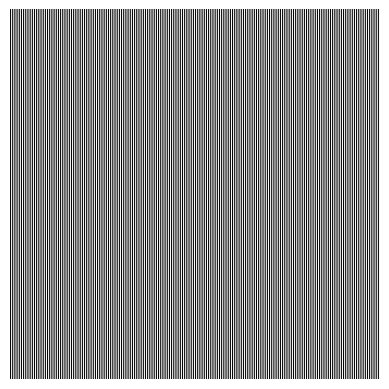

In [7]:
# Create an array of zeros (black)
image = np.zeros((400, 400), dtype=np.uint8)
image[:, 1::2] = 255
img = Image.fromarray(image)
img.save('Image.png')
# Display the image using matplotlib
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')  # Turn off axis labels
plt.show()


**Task-2:** Resize this image to 200x200, and comment on the output. What do you observe? 

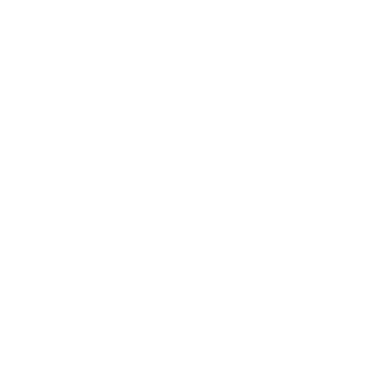

In [8]:
# Convert the numpy array to a PIL image
img = Image.fromarray(image)
# Resize the image to 200x200
img_resized = img.resize((200, 200), Image.NEAREST)
# Convert back to numpy array for plotting
resized_image_array = np.array(img_resized)
# Display the resized image using matplotlib
plt.imshow(resized_image_array, cmap='gray', vmin=0, vmax=255)
plt.axis('off') 
plt.show()

**Observation:**

In the task, I observed that the original image, which was 400x400 in size, had an alternating pattern of black and white pixels. The pattern followed a sequence where one black pixel was followed by one white pixel across the entire image. After resizing the image to 200x200, the result was a completely white image. This occurred because the resizing process caused the black pixel values to be discarded, leaving only the white pixels, which resulted in the image appearing entirely white.

**Task-3:** Design your own algorithm and resize again such that the image details are retained in the output image. 

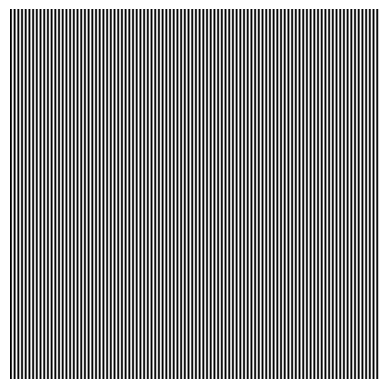

In [9]:
def custom_resize(image):
    resized_image = np.zeros((200, 200), dtype=np.uint8)
    const  = 0
    check = -1
    for i in range(200):
        j = 0
        img_ind = 0
        while j < 400:
            if const == 0:
                check *= -1
            if image[i, j] == 0:
                const += 1
            else:
                const -= 1
            if check == 1:
                resized_image[i, img_ind] = image[i * 2, j]
                img_ind += 1
            j += 1
    return resized_image
resized_image = custom_resize(image)
# Convert back to numpy array for plotting
a = np.array(resized_image)
# Display the resized image using matplotlib
plt.imshow(a, cmap='gray', vmin=0, vmax=255)
plt.axis('off')  # Turn off axis labels
plt.show()

**Task-4:** Create a new image of size 400x400, but this time first 2 columns are black, then two columns are white, and this pattern continues.  

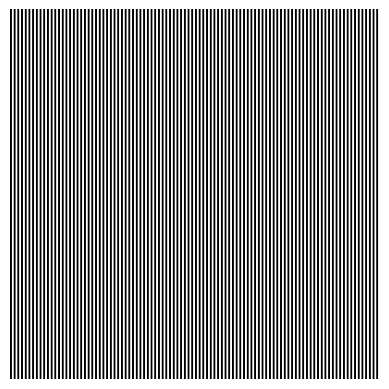

In [10]:
# Create an array of zeros (black)
image_2 = np.zeros((400, 400), dtype=np.uint8)
# Apply the alternating pattern: 2 columns black, 2 columns white
image_2[:, ::4] = 0      # Set every 4th column (starting from 0) to black
image_2[:, 1::4] = 0     # Set every 4th column (starting from 1) to black
image_2[:, 2::4] = 255   # Set every 4th column (starting from 2) to white
image_2[:, 3::4] = 255   # Set every 4th column (starting from 3) to white

# Save the image
img2 = Image.fromarray(image_2)
img2.save('Image_alternating.png')
# Display the image using matplotlib
plt.imshow(image_2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')  # Turn off axis labels
plt.show()

**Task-5:** Will the algorithm you designed in part 3 work with this new image? If not, how can you improve it so that it works for both images. 

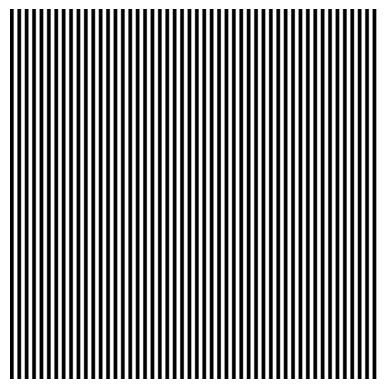

In [11]:
resized_image_2 = custom_resize(image_2)
# Convert back to numpy array for plotting
a = np.array(resized_image_2)

# Display the resized image using matplotlib
plt.imshow(a, cmap='gray', vmin=0, vmax=255)
plt.axis('off')  # Turn off axis labels
plt.show()

**Yes, Our Algorithm worked for both tasks**

**Task-6:** Interpolate the image created in part 1, by a factor of 2, and by a factor of 3, using the built-in functions with bilinear.Quadratic, and cubic parameters, and then compare and discuss the results.

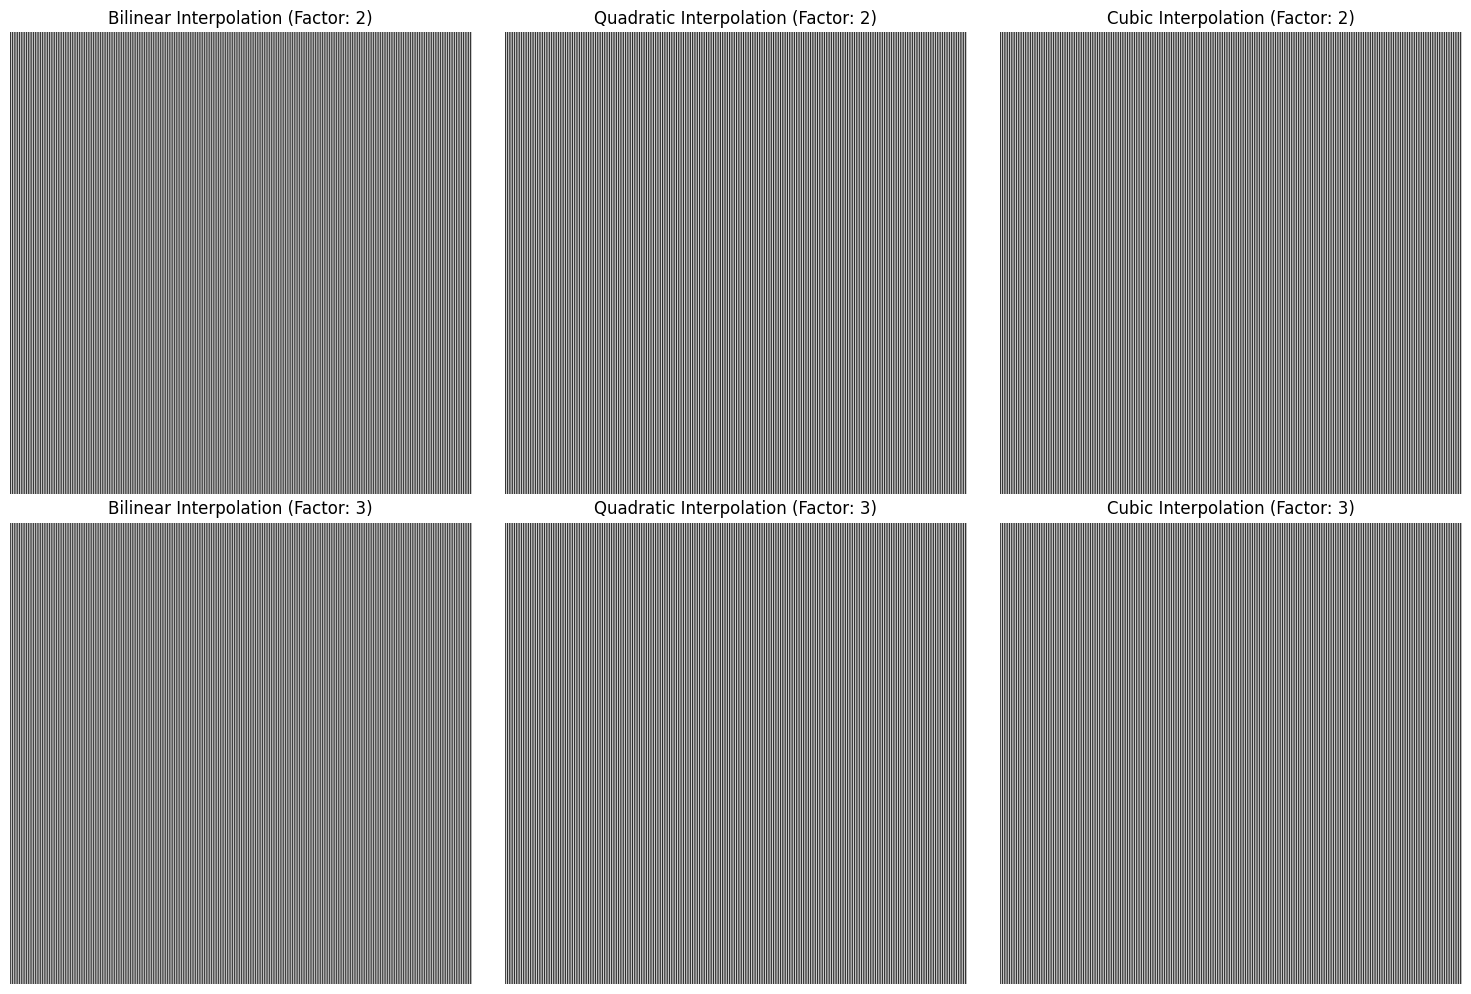

In [13]:
# Function to perform interpolation and display
def interpolate_image(ax, image, factor, order, interpolation_type):
    zoomed_image = zoom(image, factor, order=order)
    ax.imshow(zoomed_image, cmap='gray', vmin=0, vmax=255)
    ax.set_title(f'{interpolation_type} Interpolation (Factor: {factor})')
    ax.axis('off')

# Interpolation by factor of 2 and 3 using bilinear, quadratic, and cubic interpolation
factors = [2, 3]
interpolation_methods = [(1, 'Bilinear'), (2, 'Quadratic'), (3, 'Cubic')]
# Create a single figure with 3 columns and 2 rows
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  
# Iterate through the factors and interpolation methods
for i, factor in enumerate(factors):
    for j, (order, interp_type) in enumerate(interpolation_methods):
        interpolate_image(axes[i * 3 + j], image, factor, order, interp_type)
# Adjust layout and show the plot
plt.tight_layout()
plt.show()


**Observation:**

With bilinear interpolation, the resulting images still showed the alternating pattern, but they appeared somewhat blurred because the new pixels were influenced by the colors of nearby pixels. The quadratic interpolation made the image look a bit smoother, with softer transitions between black and white, making it less sharp. Cubic interpolation produced the clearest image, enhancing the edges and making the pattern more distinct.

Overall, while all three methods kept the basic alternating pattern, cubic interpolation gave the best clarity, followed by quadratic and then bilinear. This shows how different interpolation techniques can affect the quality of images, especially in patterns with high contrast like the black and white pixels in this task.

**Task-7:** Now Implement your own bilinear interpolation function and resize the same input image by a factor of 2 and 3. 

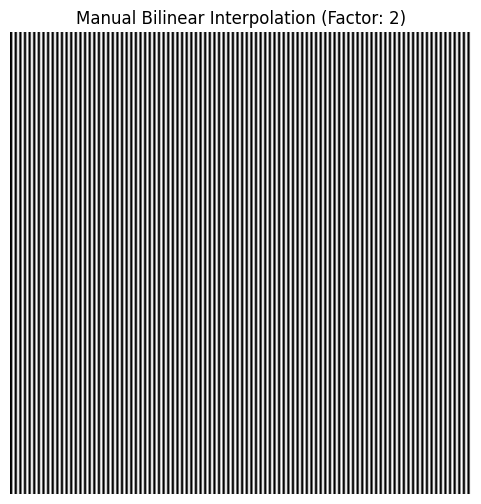

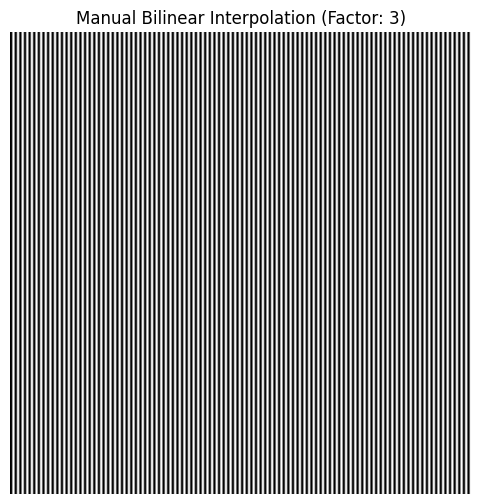

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Function to perform bilinear interpolation manually
def bilinear_interpolation(image, factor):
    # Get the original dimensions
    orig_height, orig_width = image.shape
    new_height = int(orig_height * factor)
    new_width = int(orig_width * factor)
    resized_image = np.zeros((new_height, new_width), dtype=np.uint8)
    
    # Scale factors for mapping new pixel positions to original image coordinates
    row_scale = (orig_height - 1) / (new_height - 1)
    col_scale = (orig_width - 1) / (new_width - 1)
    # Loop over the new image's pixels
    for i in range(new_height):
        for j in range(new_width):
            # Map the new image's pixel (i, j) back to the original image's coordinates
            orig_x = j * col_scale
            orig_y = i * row_scale
            x1 = int(np.floor(orig_x))
            y1 = int(np.floor(orig_y))
            x_diff = orig_x - x1
            y_diff = orig_y - y1
            x2 = min(x1 + 1, orig_width - 1)
            y2 = min(y1 + 1, orig_height - 1)
            top_left = image[y1, x1]
            top_right = image[y1, x2]
            bottom_left = image[y2, x1]
            bottom_right = image[y2, x2]
            interpolated_value = (top_left * (1 - x_diff) * (1 - y_diff) +
                                  top_right * x_diff * (1 - y_diff) +
                                  bottom_left * (1 - x_diff) * y_diff +
                                  bottom_right * x_diff * y_diff)
            resized_image[i, j] = int(interpolated_value)
    return resized_image

# Function to display images
def display_image(image, title):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.show()

# Original image
image = np.zeros((400, 400), dtype=np.uint8)
image[:, 1::2] = 255  # Example pattern

# Resize the image by a factor of 2 and 3 using bilinear interpolation
resized_image_2 = bilinear_interpolation(image, 2)
display_image(resized_image, f'Manual Bilinear Interpolation (Factor: {2})')
resized_image_3 = bilinear_interpolation(image, 3)
display_image(resized_image, f'Manual Bilinear Interpolation (Factor: {3})')

**Task-8** Calculate the difference between your output and the bilinear output of the built-in function. Do 
you get a completely zero difference output? 

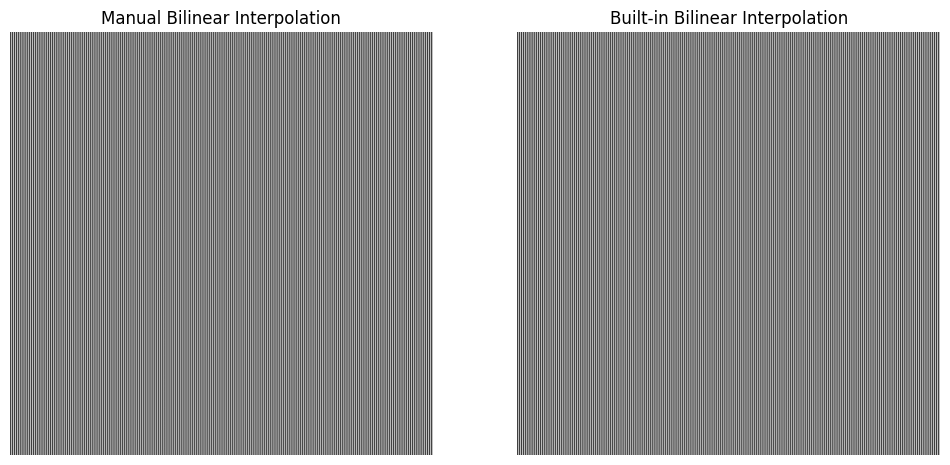

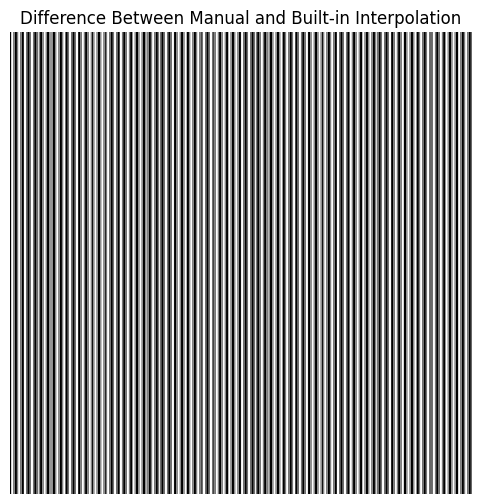

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

# Function to display the difference between two images
def display_difference(image1, image2, title):
    difference = np.abs(image1 - image2)
    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.imshow(difference, cmap='gray')
    plt.axis('off')
    plt.show()
    return difference

# Resize using built-in bilinear interpolation (order=1)
built_in_resized_image = zoom(image, 2, order=1)

# Display the images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Manual Bilinear Interpolation')
plt.imshow(resized_image_2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Built-in Bilinear Interpolation')
plt.imshow(built_in_resized_image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

# Calculate and display the difference between the two
difference = display_difference(resized_image_2, built_in_resized_image, 'Difference Between Manual and Built-in Interpolation')

**Answer:**

No, the difference is not completelly zero.